In [6]:
train=pd.read_csv('C:/Users/devik/Downloads/train.csv')
test=pd.read_csv('C:/Users/devik/Downloads/test.csv')

In [10]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
# Perform summary statistics to describe the numerical features (e.g., age, fare)
train[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Text(0, 0.5, 'Frequency')

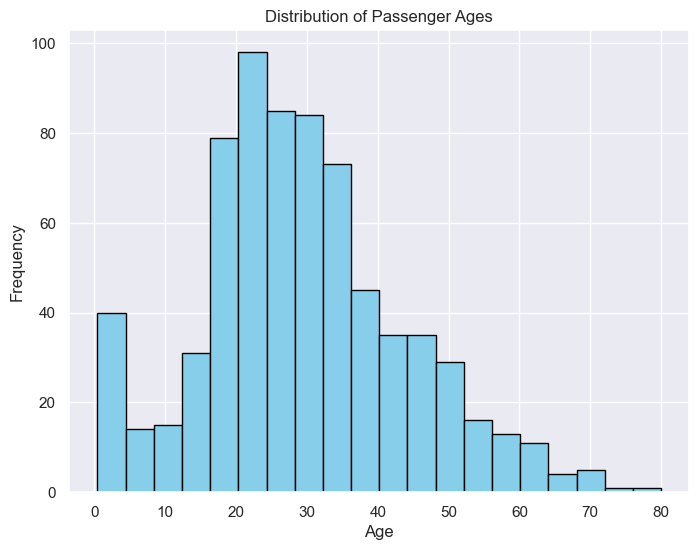

In [14]:
#Visualize the distribution of passenger ages using a histogram.
plt.figure(figsize=(8, 6))
plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [22]:
#Create a bar chart to visualize the count of passengers in each ticket class (1st, 2nd, 3rd).
# Count the number of passengers in each ticket class
ticket_class_counts = train['Pclass'].value_counts().sort_index()


<Axes: title={'center': 'Count of Passengers in Each Ticket Class'}, xlabel='Pclass', ylabel='Count'>

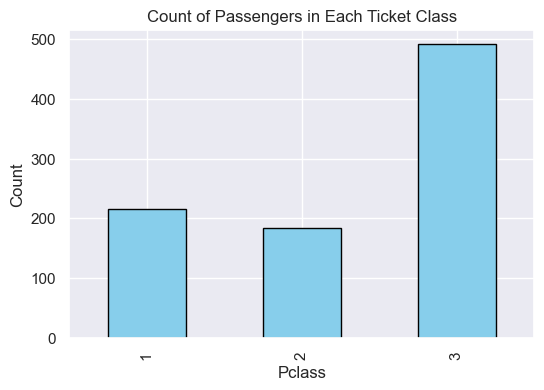

In [27]:
plt.figure(figsize=(6, 4))
plt.title('Count of Passengers in Each Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
ticket_class_counts.plot(kind='bar', color='skyblue', edgecolor='black')


In [30]:
# Calculate survival rates by gender,ticket class,age,etc
survival_by_gender = train.groupby('Sex')['Survived'].mean()
survival_by_ticket_class = train.groupby('Pclass')['Survived'].mean()
survival_by_age = train.groupby('Age')['Survived'].mean()

array([<Axes: title={'center': 'survival rate by gender'}, ylabel='Survived'>],
      dtype=object)

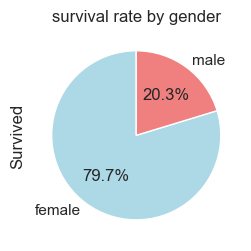

In [51]:
#pie chart for survival rate by gender
plt.figure(figsize=(6,8))
plt.subplot(1, 2, 2)
plt.title('survival rate by gender')
survival_by_gender.plot.pie(subplots=True, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, legend=False)

array([<Axes: title={'center': 'survival rate by ticket class'}, ylabel='Survived'>],
      dtype=object)

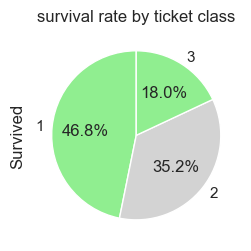

In [52]:
#pie chart for survival rate by ticket class
plt.figure(figsize=(6,8))
plt.subplot(1, 2, 2)
plt.title('survival rate by ticket class')
survival_counts_class.plot.pie(subplots=True, autopct='%1.1f%%', colors=['lightgreen', 'lightgrey'], startangle=90, legend=False)

In [ ]:
#bar chart for survial rate by age
plt.figure(figsize=(26, 6))
plt.title('Survival by age')
plt.xlabel('age')
plt.ylabel('Survived')
survival_by_age.plot(kind='bar' , color='red' , edgecolor='purple')

([<matplotlib.axis.XTick at 0x1c1c26f13d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

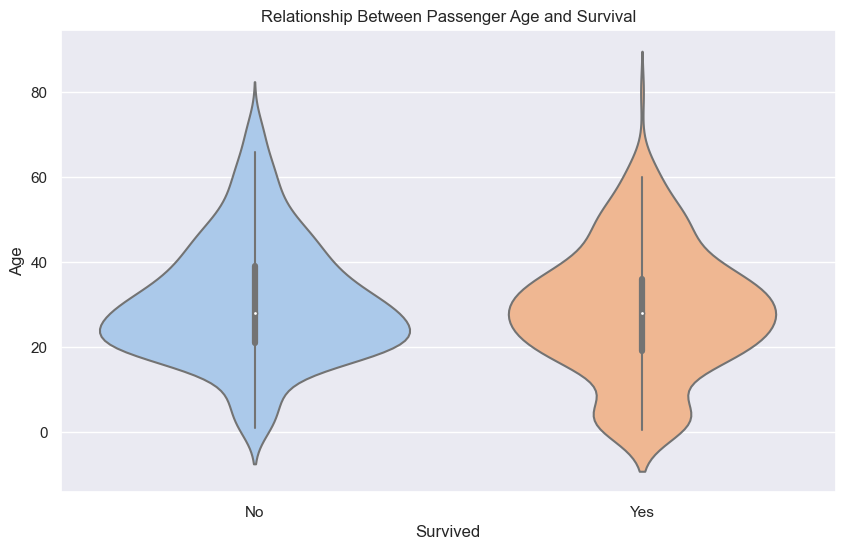

In [64]:
#Explore the relationship between passenger age and survival status using a box plot or violin plot.
age_survival = train[['Age', 'Survived']].dropna()
#violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=age_survival, palette='pastel')
plt.title('Relationship Between Passenger Age and Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])

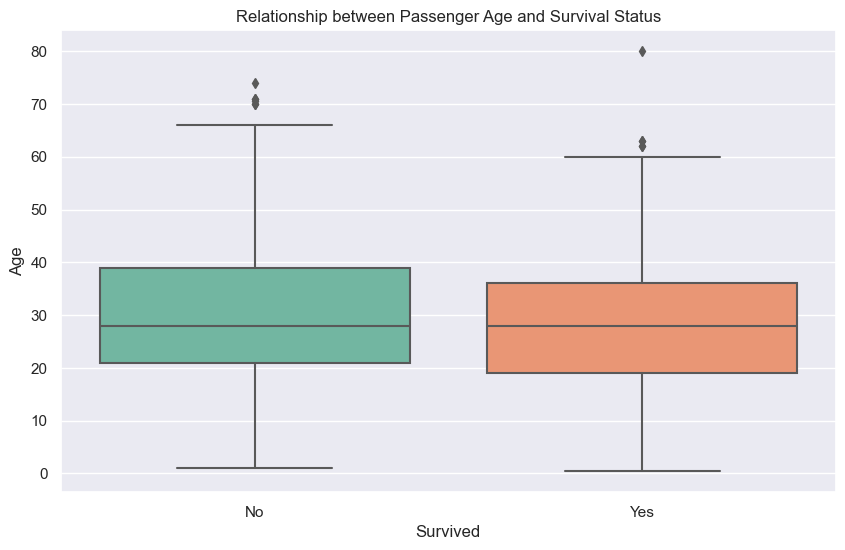

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=age_survival, palette='Set2')
plt.title('Relationship between Passenger Age and Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [88]:
# Check for missing values in the dataset
missing_values = test.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [84]:
#Strategy for handling missing values
#Replace missing values in the 'Age' column with the median age
median_age = test['Age'].median()
test['Age'].fillna(median_age, inplace=True)
print("\nMissing values after handling:")
Amissing_values = test.isnull().sum()
print(Amissing_values)


Missing values after handling:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

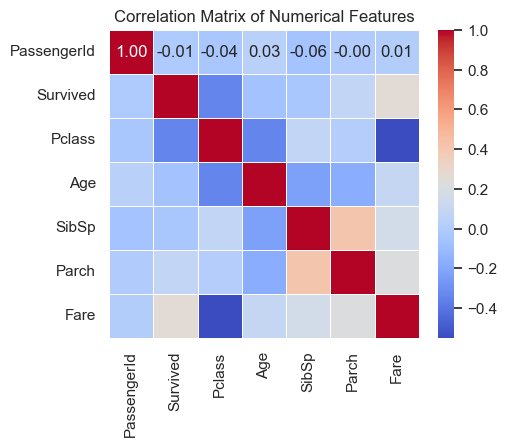

In [98]:
#Select numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64'])
#Calculate correlation matrix
correlation_matrix = numerical_features.corr()
#heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')